

# Módulo 2 Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución.


**Alumna:**
*   Frida Cano Falcón A01752953

Programa uno de los algoritmos vistos en el módulo (o que tu profesor de módulo autorice) haciendo uso de una biblioteca o framework de aprendizaje máquina. Lo que se busca es que demuestres tu conocimiento sobre el framework y como configurar el algoritmo.






## Librerías

In [57]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## Directorio

In [58]:
from google.colab import drive

drive.mount("/content/gdrive")
!pwd  # show current path

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Semestres/7mo Semestre/Machine Learning


In [59]:
%cd "/content/gdrive/MyDrive/7mo Semestre/Machine Learning"
!ls  # show current directory

/content/gdrive/MyDrive/Semestres/7mo Semestre/Machine Learning
'El marcapasos.csv'		        Ses03_Template_RegresionLogistica.ipynb
 ML_RegresionLineal.ipynb	        wine.data
 Ses02_Template_RegresionLineal.ipynb   wine.names


## Extracción de datos

Se carga la base de datos


In [60]:
data_base = pd.read_csv("El marcapasos.csv")

## Características del dataset


Este dataset está compuesto de tres columnas que describen las siguientes características de personas que usan o no un marcapasos:


*   Periodo entre pulsos - numérico
*   Intensidad de pulso  - numérico
*   Usa marcapasos o no  - categórico

Información de la base de datos





In [61]:
data_base.head() # Head

,Periodo entre pulsos,Intensidad de pulso,Marcapasos
0,1.2,0.131,Sin MP
1,0.9,0.303,Sin MP
2,0.9,0.297,Sin MP
3,0.8,0.416,Sin MP
4,0.7,0.585,Sin MP


In [62]:
data_base.info() # DataSet information. Train file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Periodo entre pulsos  102 non-null    float64
 1   Intensidad de pulso   102 non-null    float64
 2   Marcapasos            102 non-null    object 
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


Convertimos las variables categóricas en numéricas.

In [63]:
data_base['Marcapasos'].replace(['Sin MP', 'Con MP'],
                        [0, 1], inplace=True)
data_base.apply (pd.to_numeric, errors='coerce')

,Periodo entre pulsos,Intensidad de pulso,Marcapasos
0,1.20,0.131,0
1,0.90,0.303,0
2,0.90,0.297,0
3,0.80,0.416,0
4,0.70,0.585,0
...,...,...,...
97,0.81,0.298,1
98,0.93,0.143,1
99,1.04,0.019,1
100,1.06,0.006,1


Sacamos las métricas importantes.

In [64]:
data_base.describe() # Statistics Analysis

,Periodo entre pulsos,Intensidad de pulso,Marcapasos
count,102.000000,102.000000,102.000000
mean,1.001471,0.201520,0.500000
std,0.301936,0.123047,0.502469
min,0.690000,0.005000,0.000000
25%,0.830000,0.109000,0.000000
50%,0.935000,0.191000,0.500000
75%,1.100000,0.292250,1.000000
max,2.800000,0.585000,1.000000




Vemos la correlación entre los datos.



<Axes: >

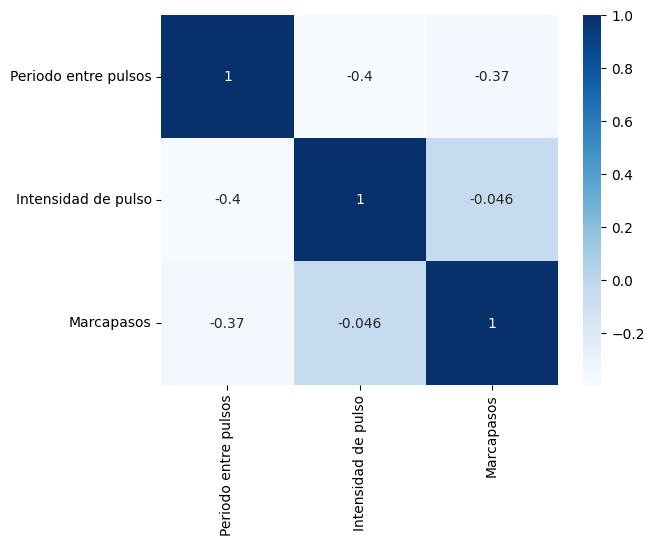

In [65]:
corr_data = data_base.corr()
sb.heatmap(corr_data, cmap = 'Blues', annot = True)

## Implementación de modelo - Árbol de decisión

### Librería de Modelo y herramientas de visualización

In [66]:
#Librería Separar dataset
from sklearn.model_selection import train_test_split

#Librerías para Modelos de clasificación
from sklearn import tree

#Librería para graficar
import graphviz

#Se usa en la función que no hemos usado todavía en el proyecto
from sklearn.model_selection import cross_val_score
#Librerías para realizar un análisis de la implementación del modelo
from sklearn.metrics import accuracy_score
from sklearn import metrics

### Partición de la base de datos

In [67]:
#Separamos tipos de variables en dependientes e independientes
feature_names = ['Periodo entre pulsos', 'Intensidad de pulso']
x_data = data_base[feature_names]   # variables predictoras
y_data = data_base['Marcapasos']    # variable de respuesta
#Se divide el dataset en entrenamiento y test, con un ratio de 80-20
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

### Pruebas con un mínimo de muestras para expandir el nodo

#### Primera prueba.

Hiper-parámetros :

*   Número de niveles: 3
*   Mínimo de muestras para expandir: 2

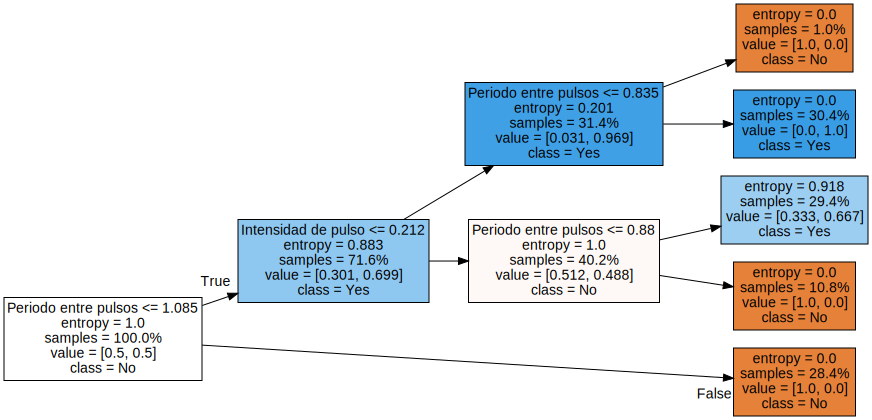

In [68]:
my_tree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2)
my_tree.fit(x_data,y_data)
class_names = ['No','Yes']
myTreeData = tree.export_graphviz(my_tree, feature_names=feature_names,
 class_names=class_names, leaves_parallel=True,
 filled=True, proportion=True, rotate=True)
graphData = graphviz.Source(myTreeData)
graphData

Resultados

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Fone: 1.0


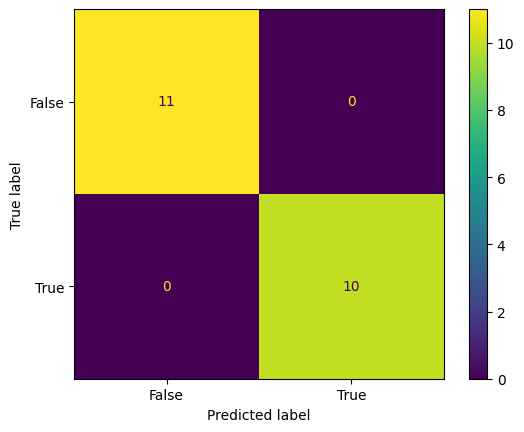

In [69]:
#Matriz de confusión
y_pred = my_tree.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / (confusion_matrix[0,0]+confusion_matrix[0,1]+confusion_matrix[1,0]+confusion_matrix[1,1])
print('Accuracy:',accuracy)
precision = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[1,0])
print("Precision:",precision)
recall = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[0,1])
print("Recall:",recall)
Fone = (2*precision*recall)/(precision+recall)
print('Fone:',Fone)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

#### Segunda prueba.

Hiper-parámetros :

*   Número de niveles: 4
*   Mínimo de muestras para expandir: 2

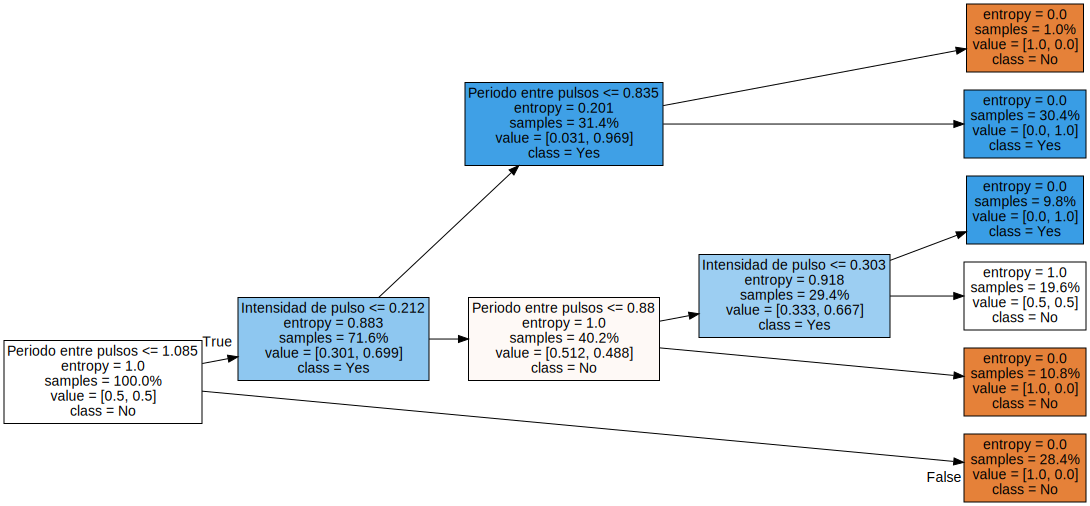

In [70]:
my_tree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4, min_samples_split=2)
my_tree.fit(x_data,y_data)
class_names = ['No','Yes']
myTreeData = tree.export_graphviz(my_tree, feature_names=feature_names,
 class_names=class_names, leaves_parallel=True,
 filled=True, proportion=True, rotate=True)
graphData = graphviz.Source(myTreeData)
graphData

Resultados

Accuracy: 0.9523809523809523
Precision: 0.9166666666666666
Recall: 1.0
Fone: 0.9565217391304348


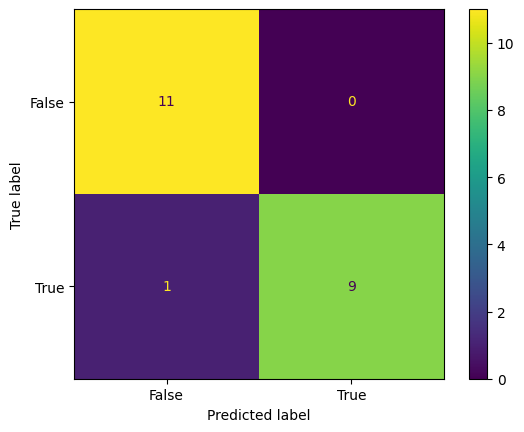

In [71]:
#Matriz de confusión
y_pred = my_tree.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / (confusion_matrix[0,0]+confusion_matrix[0,1]+confusion_matrix[1,0]+confusion_matrix[1,1])
print('Accuracy:',accuracy)
precision = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[1,0])
print("Precision:",precision)
recall = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[0,1])
print("Recall:",recall)
Fone = (2*precision*recall)/(precision+recall)
print('Fone:',Fone)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

#### Tercera prueba.

Hiper-parámetros :

*   Número de niveles: 5
*   Mínimo de muestras para expandir: 2

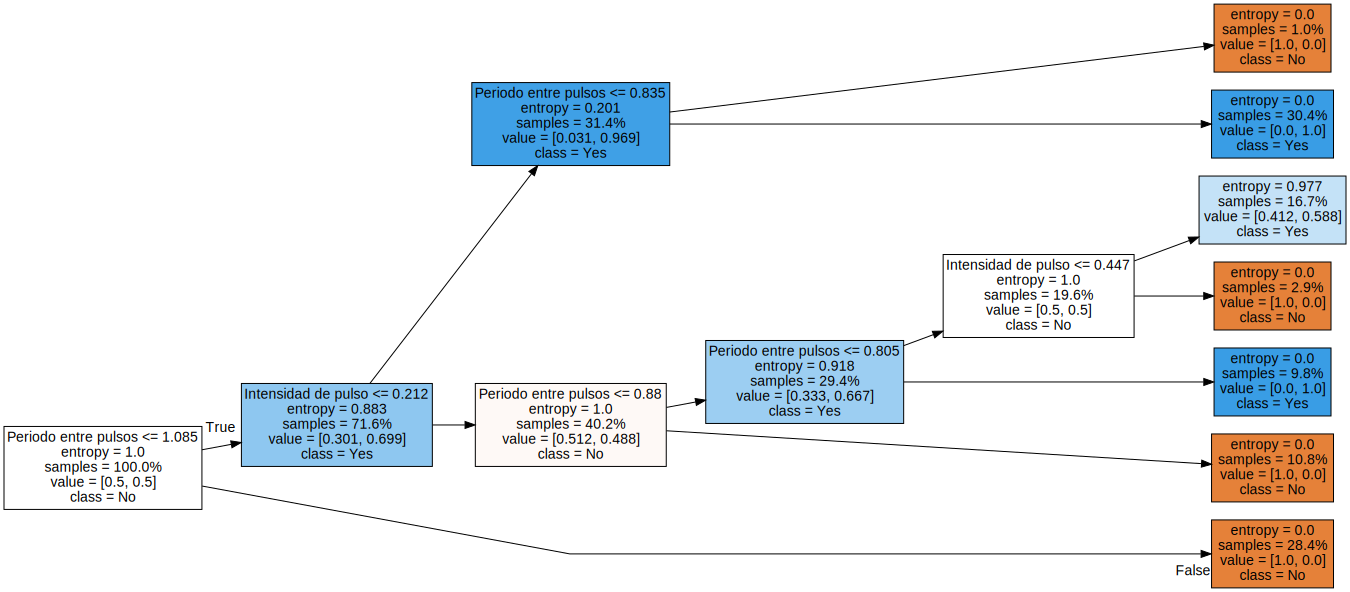

In [72]:
my_tree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=2)
my_tree.fit(x_data,y_data)
class_names = ['No','Yes']
myTreeData = tree.export_graphviz(my_tree, feature_names=feature_names,
 class_names=class_names, leaves_parallel=True,
 filled=True, proportion=True, rotate=True)
graphData = graphviz.Source(myTreeData)
graphData

Resultados

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Fone: 1.0


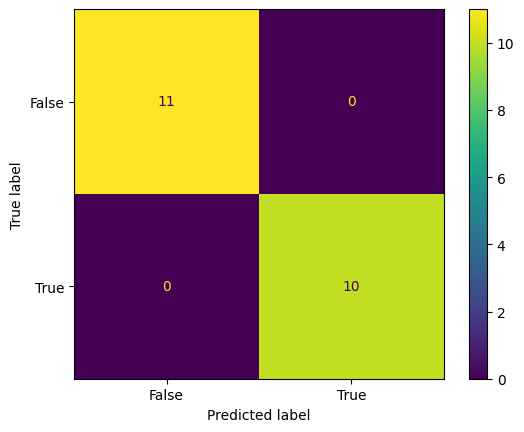

In [73]:
#Matriz de confusión
y_pred = my_tree.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / (confusion_matrix[0,0]+confusion_matrix[0,1]+confusion_matrix[1,0]+confusion_matrix[1,1])
print('Accuracy:',accuracy)
precision = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[1,0])
print("Precision:",precision)
recall = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[0,1])
print("Recall:",recall)
Fone = (2*precision*recall)/(precision+recall)
print('Fone:',Fone)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### Pruebas sin el mínimo de muestras para expandir el nodo

#### Primera prueba.

Hiper-parámetros :

*   Número de niveles: 3

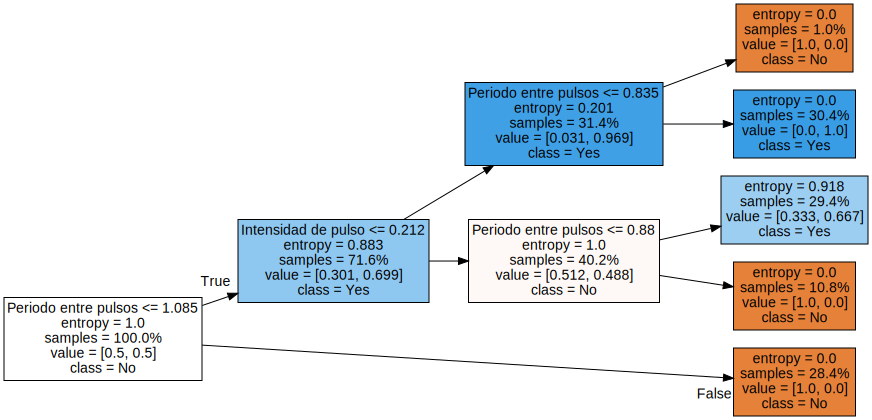

In [74]:
my_tree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
my_tree.fit(x_data,y_data)
class_names = ['No','Yes']
myTreeData = tree.export_graphviz(my_tree, feature_names=feature_names,
 class_names=class_names, leaves_parallel=True,
 filled=True, proportion=True, rotate=True)
graphData = graphviz.Source(myTreeData)
graphData

Resultados

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Fone: 1.0


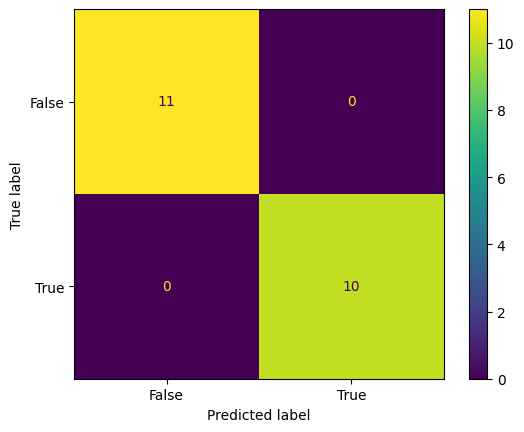

In [75]:
#Matriz de confusión
y_pred = my_tree.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / (confusion_matrix[0,0]+confusion_matrix[0,1]+confusion_matrix[1,0]+confusion_matrix[1,1])
print('Accuracy:',accuracy)
precision = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[1,0])
print("Precision:",precision)
recall = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[0,1])
print("Recall:",recall)
Fone = (2*precision*recall)/(precision+recall)
print('Fone:',Fone)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

#### Segunda prueba.

Hiper-parámetros :

*   Número de niveles: 4

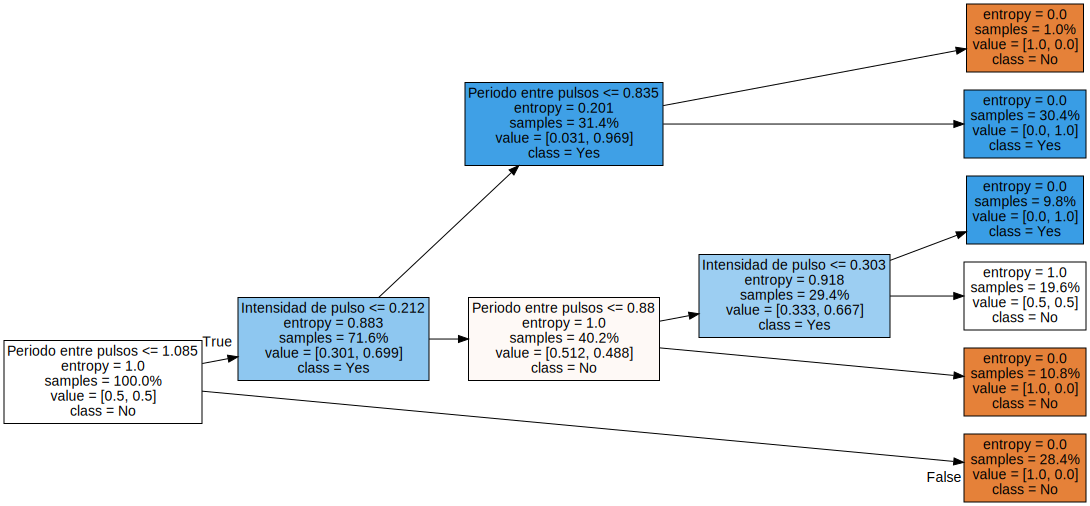

In [76]:
my_tree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)
my_tree.fit(x_data,y_data)
class_names = ['No','Yes']
myTreeData = tree.export_graphviz(my_tree, feature_names=feature_names,
 class_names=class_names, leaves_parallel=True,
 filled=True, proportion=True, rotate=True)
graphData = graphviz.Source(myTreeData)
graphData

Resultados

Accuracy: 0.9523809523809523
Precision: 0.9166666666666666
Recall: 1.0
Fone: 0.9565217391304348


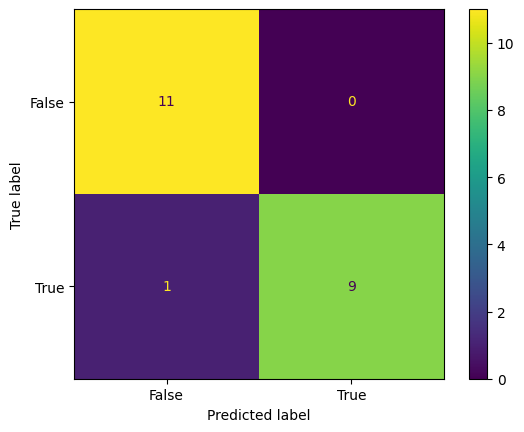

In [77]:
#Matriz de confusión
y_pred = my_tree.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / (confusion_matrix[0,0]+confusion_matrix[0,1]+confusion_matrix[1,0]+confusion_matrix[1,1])
print('Accuracy:',accuracy)
precision = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[1,0])
print("Precision:",precision)
recall = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[0,1])
print("Recall:",recall)
Fone = (2*precision*recall)/(precision+recall)
print('Fone:',Fone)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

#### Tercera prueba.

Hiper-parámetros :

*   Número de niveles: 5

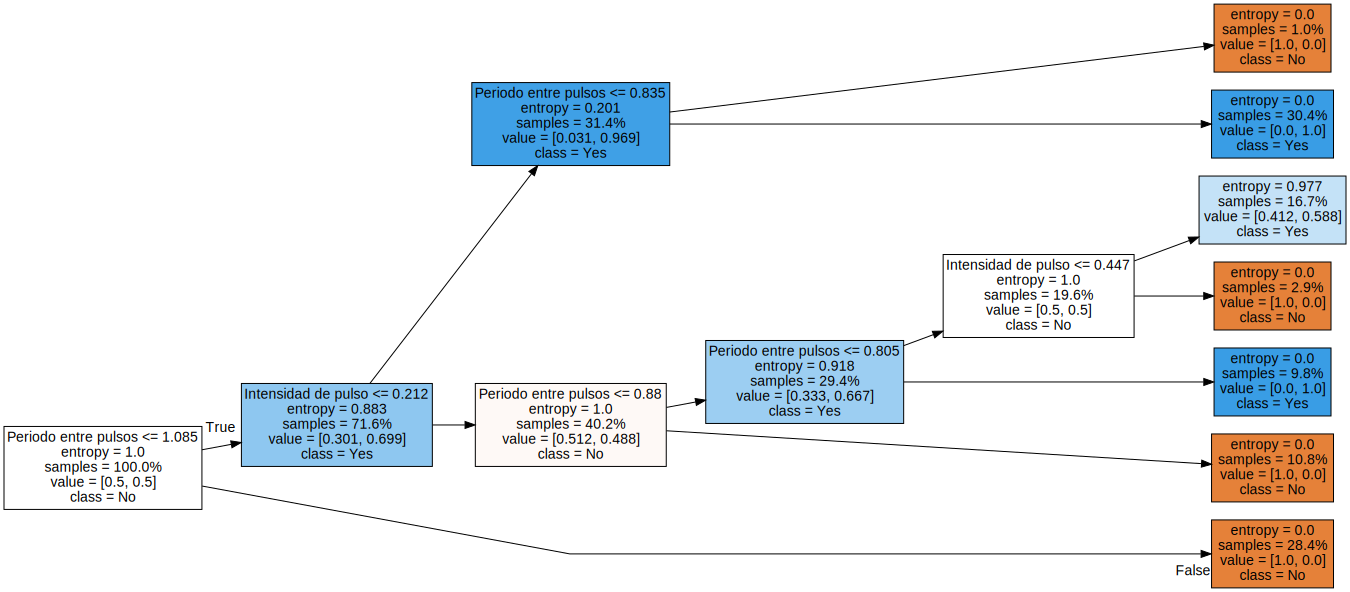

In [78]:
my_tree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
my_tree.fit(x_data,y_data)
class_names = ['No','Yes']
myTreeData = tree.export_graphviz(my_tree, feature_names=feature_names,
 class_names=class_names, leaves_parallel=True,
 filled=True, proportion=True, rotate=True)
graphData = graphviz.Source(myTreeData)
graphData

Resultados

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Fone: 1.0


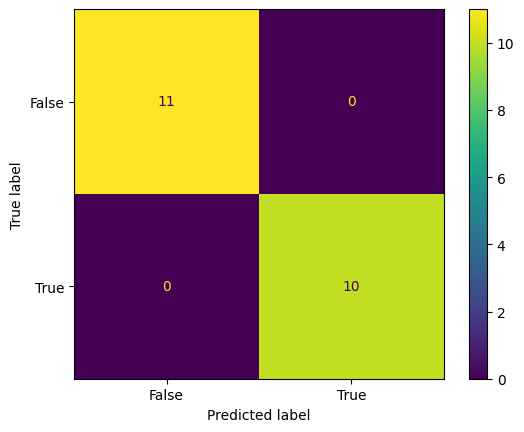

In [79]:
#Matriz de confusión
y_pred = my_tree.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / (confusion_matrix[0,0]+confusion_matrix[0,1]+confusion_matrix[1,0]+confusion_matrix[1,1])
print('Accuracy:',accuracy)
precision = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[1,0])
print("Precision:",precision)
recall = confusion_matrix[0,0] /(confusion_matrix[0,0]+confusion_matrix[0,1])
print("Recall:",recall)
Fone = (2*precision*recall)/(precision+recall)
print('Fone:',Fone)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()